In [24]:
# This is equivalent to Python's `import numpy as np`
let np = Python.import_module("numpy")

In [26]:
np.random.seed(1337)

In [28]:
%%python
import os
import sys
sys.path.append(os.getcwd())
print(sys.path)

['/opt/conda/lib/python3.8/site-packages', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '/.modular/KGEN/utils/jupyter-mojo/extension', '/.modular/Support/python', '/home/jovyan/micrograd.🔥']


In [30]:
let sklearn = Python.import_module("utils.sklearn")

let r = sklearn.get_moons(1337)

let X = r[0]
let y = r[1]

y = y*2 - 1 # make y be -1 or 1



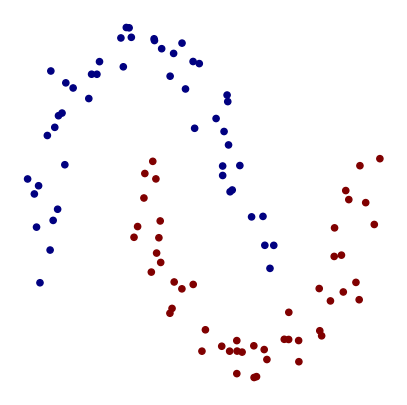

In [31]:
let plt = Python.import_module("utils.pyplot")
plt.show(X, y)

In [4]:
# real mojo starts here
from Vector import DynamicVector

@value
struct Value:
    """ stores a single scalar value and its gradient """

    var data: Float32 # TODO
    var grad: Int
    var _backward: def() capturing # Mojo function type
    var _prev: DynamicVector[NoneType] # https://docs.modular.com/mojo/roadmap.html#recursive-structs-dont-work  
    var _op: StringLiteral

    def __init__(inout self: Self, data: Float32, _children: DynamicVector[NoneType], _op: StringLiteral):  #  _children=(), _op=''):
        self.data = data
        self.grad = 0
        # internal variables used for autograd graph construction
        def f(): return None
        self._backward = f
        self._prev = _children #  #  self._prev = Set(_children) # error: Expression [3]:21:22: use of unknown declaration 'Set'
        self._op = _op # the op that produced this node, for graphviz / debugging / etc

    



In [8]:
# import random
# from micrograd.engine import Value

@value
struct Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self): DynamicVector[NoneType]:
        return []


error: Expression [8]:9:33: 'object' does not implement the '__iter__' method
        for p in self.parameters():
                                ^

error: Expression [8]:10:13: use of unknown declaration 'p'
            p.grad = 0
            ^

